# DADS5001 : Earthquake Analysis



# 01_import Data & Data Preparation



In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns



#Upload Excel : Earthqurke_D1
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

df.head()





Saving DATA_Earthquake_Draft1_eng.xlsx to DATA_Earthquake_Draft1_eng.xlsx


,No.,REF. ID,DATE-TIME UTC,DATE THAI,YEAR,TIME THAI,LAT.,LONG.,MAG.,MAG_RANGE,...,DEPTH.,PHASE.,REGION_NANE_THAI,SUB_DISTRICT,DISTRICT,PROVINCE,COUNTRY,THAI_REGION,REGION_NAME_ENG,DETAIL
0,1.0,TM0001,2007-01-04 08:38:00,2007-01-04,2007.0,15:38:00,18.9,99.00,2.4,2.0 - 3.9,...,0.0,0.0,อ.แม่ริม จ.เชียงใหม่,NaN,แม่ริม,Chiang Mai,Thailand,Northern,NaN,NaN
1,2.0,TM0002,2007-01-06 02:23:00,2007-01-06,2007.0,09:23:00,18.9,99.00,3.1,2.0 - 3.9,...,0.0,0.0,อ.แม่ริม จ.เชียงใหม่,NaN,แม่ริม,Chiang Mai,Thailand,Northern,NaN,NaN
2,3.0,TM0003,2007-04-22 06:18:00,2007-04-22,2007.0,13:18:00,19.4,99.36,4.5,4.0 - 4.9,...,0.0,0.0,อ.เวียงป่าเป้า จ.เชียงราย,NaN,เวียงป่าเป้า,Chiang Rai,Thailand,Northern,NaN,NaN
3,4.0,TM0004,2007-04-23 14:18:00,2007-04-23,2007.0,21:18:00,19.6,99.20,4.0,4.0 - 4.9,...,0.0,0.0,อ.พร้าว จ.เชียงใหม่,NaN,พร้าว,Chiang Mai,Thailand,Northern,NaN,NaN
4,5.0,TM0005,2007-05-16 10:04:00,2007-05-16,2007.0,17:04:00,21.0,100.50,4.7,4.0 - 4.9,...,0.0,0.0,พรมแดนลาว-พม่า,NaN,NaN,Other,Myanmar-Laos Border,NaN,NaN,ห่างจาก จ.เชียงราย 95 กม. รู้สึกสั่นไหวที่หลาย...


In [3]:
#check df

df.info()
df.describe
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               14986 non-null  float64
 1   REF. ID           14986 non-null  object 
 2   DATE-TIME UTC     14986 non-null  object 
 3   DATE THAI         14986 non-null  object 
 4   YEAR              14986 non-null  float64
 5   TIME THAI         14986 non-null  object 
 6   LAT.              14986 non-null  float64
 7   LONG.             14986 non-null  float64
 8   MAG.              14986 non-null  float64
 9   MAG_RANGE         14986 non-null  object 
 10  MAG_RANGE_DES     14986 non-null  object 
 11  DEPTH.            14986 non-null  float64
 12  PHASE.            14986 non-null  float64
 13  REGION_NANE_THAI  14986 non-null  object 
 14  SUB_DISTRICT      1215 non-null   object 
 15  DISTRICT          3664 non-null   object 
 16  PROVINCE          14987 non-null  object

,0
No.,1
REF. ID,1
DATE-TIME UTC,1
DATE THAI,1
YEAR,1
TIME THAI,1
LAT.,1
LONG.,1
MAG.,1
MAG_RANGE,1


# 02_Data Overview and Exploration

## *-2.1 Overall Earthquake Trends in Thailand*

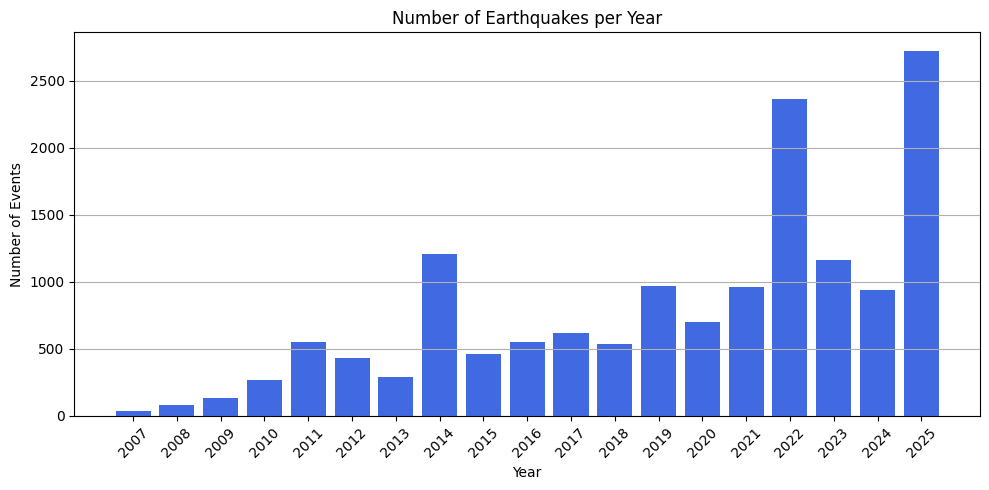

In [4]:
##Number of Earthquakes per Year "Bar Plot"


# แปลง YEAR เป็นตัวเลข แล้วกรองค่า missing
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df = df.dropna(subset=['YEAR'])

# นับจำนวนเหตุการณ์ต่อปี
year_counts = df['YEAR'].astype(int).value_counts().sort_index()

# แปลง index เป็น string เพื่อให้แกน x ไม่มี .0
years = year_counts.index.astype(str)
counts = year_counts.values

# พล็อตกราฟแท่ง
plt.figure(figsize=(10, 5))
plt.bar(years, counts, color='royalblue')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




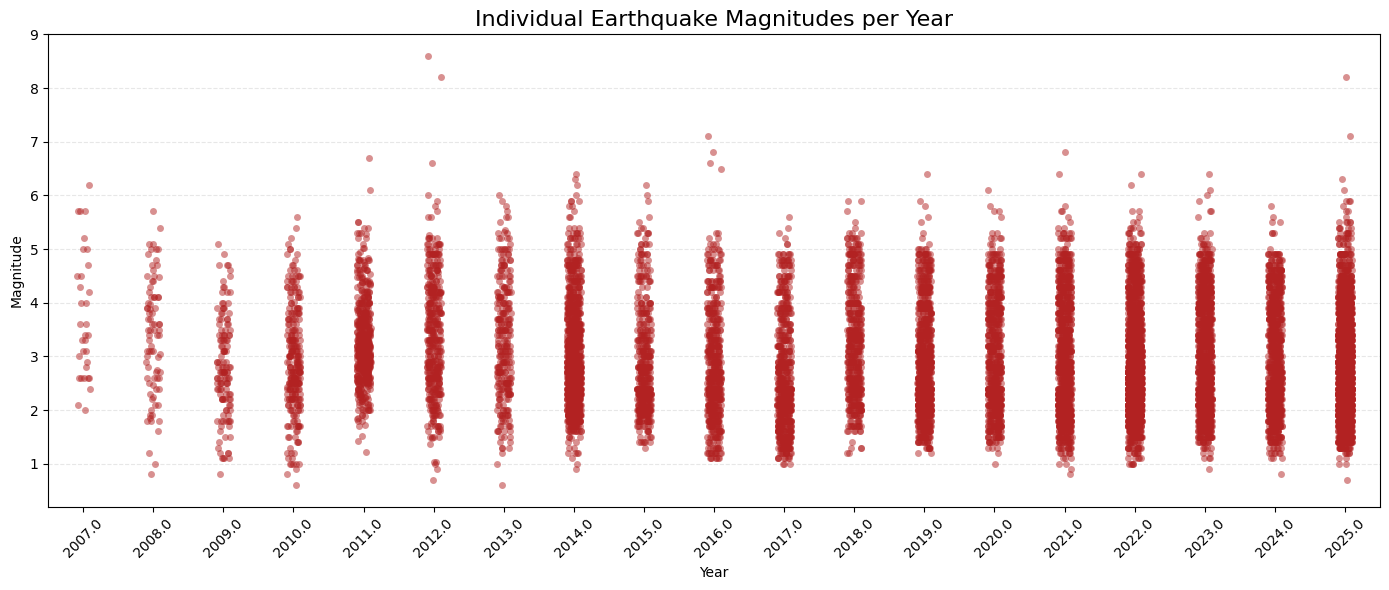

In [5]:
##Individual Earthquake Magnitudes per Year

plt.figure(figsize=(14, 6))
sns.stripplot(data=df, x='YEAR', y='MAG.', alpha=0.5, jitter=True, color='firebrick')
plt.title('Individual Earthquake Magnitudes per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

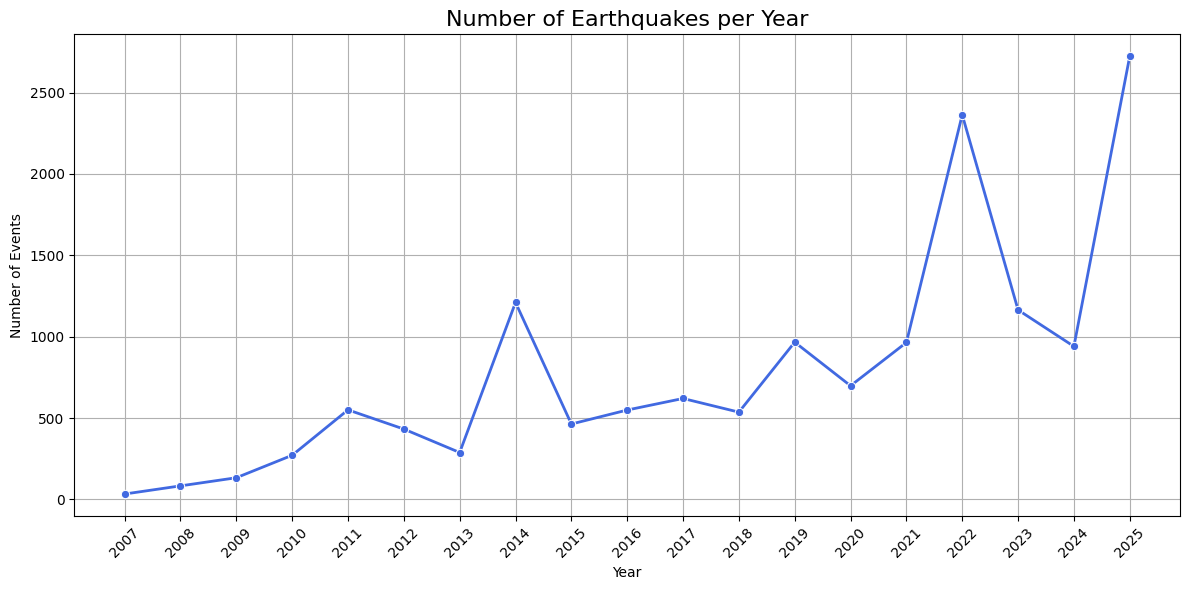

In [6]:
##Number of Earthquakes per Year "Line Plot"
# Load and clean data
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])

# Convert YEAR to int
df['YEAR'] = df['YEAR'].astype(int)

# Group and count
yearly_counts = df.groupby('YEAR').size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='YEAR', y='Count', marker='o', linewidth=2, color='royalblue')
plt.title('Number of Earthquakes per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(yearly_counts['YEAR'], rotation=45)  # Force x-axis to use int labels
plt.grid(True)
plt.tight_layout()
plt.show()


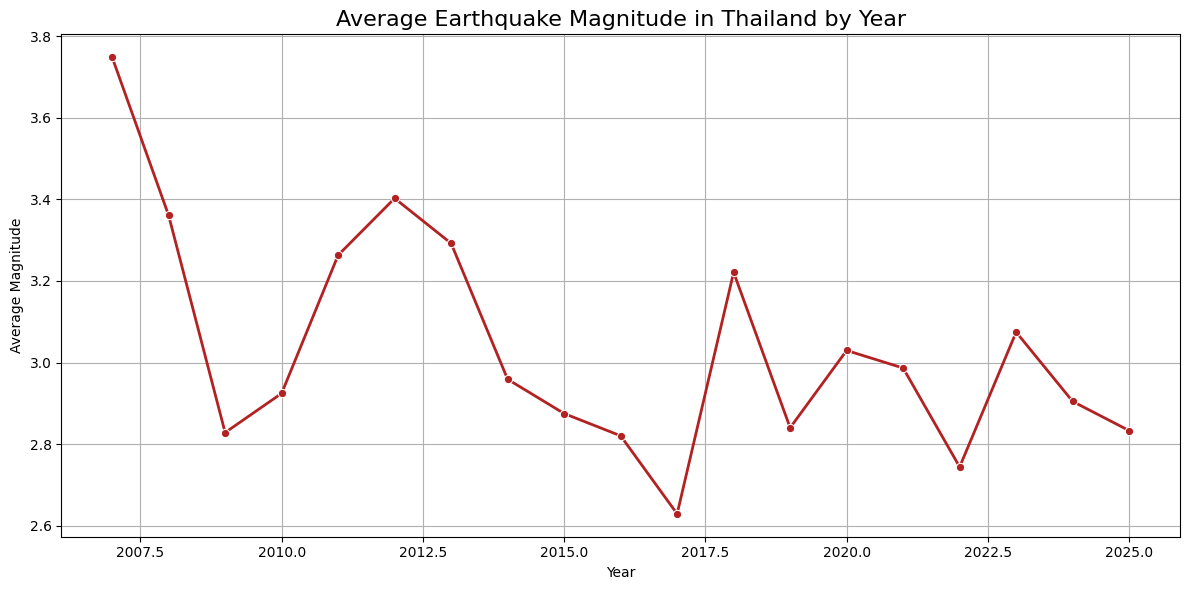

In [7]:
##Number of Magnitude per Year "Line Plot"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and prepare
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])

# Group by year and calculate average magnitude
avg_mag_by_year = df.groupby('YEAR')['MAG.'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_mag_by_year, x='YEAR', y='MAG.', marker='o', linewidth=2, color='firebrick')
plt.title('Average Earthquake Magnitude in Thailand by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


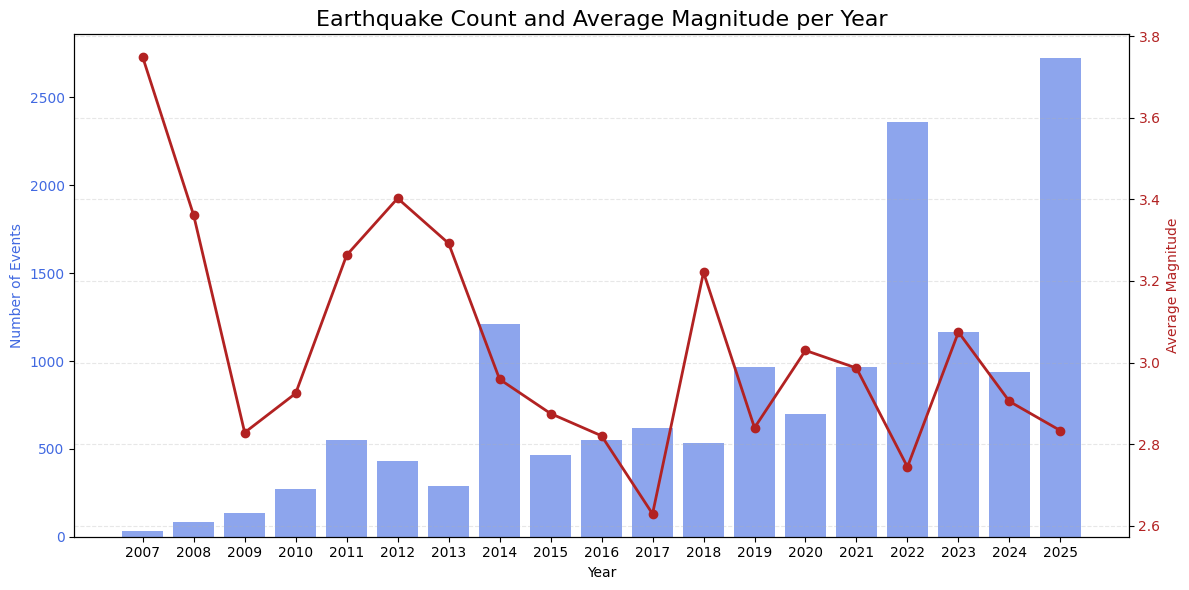

In [8]:
# โหลดและเตรียมข้อมูล
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype(int)
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])

# สร้างตารางสรุป
summary = df.groupby('YEAR').agg(
    Count=('MAG.', 'size'),
    Avg_MAG=('MAG.', 'mean')
).reset_index()

# พล็อตคู่แกน
fig, ax1 = plt.subplots(figsize=(12, 6))

# แกนซ้าย: จำนวนเหตุการณ์
ax1.bar(summary['YEAR'], summary['Count'], color='royalblue', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Events', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# แกนขวา: MAG เฉลี่ย
ax2 = ax1.twinx()
ax2.plot(summary['YEAR'], summary['Avg_MAG'], color='firebrick', marker='o', linewidth=2)
ax2.set_ylabel('Average Magnitude', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# ชื่อกราฟและจัด layout
plt.title('Earthquake Count and Average Magnitude per Year', fontsize=16)
plt.xticks(summary['YEAR'], rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

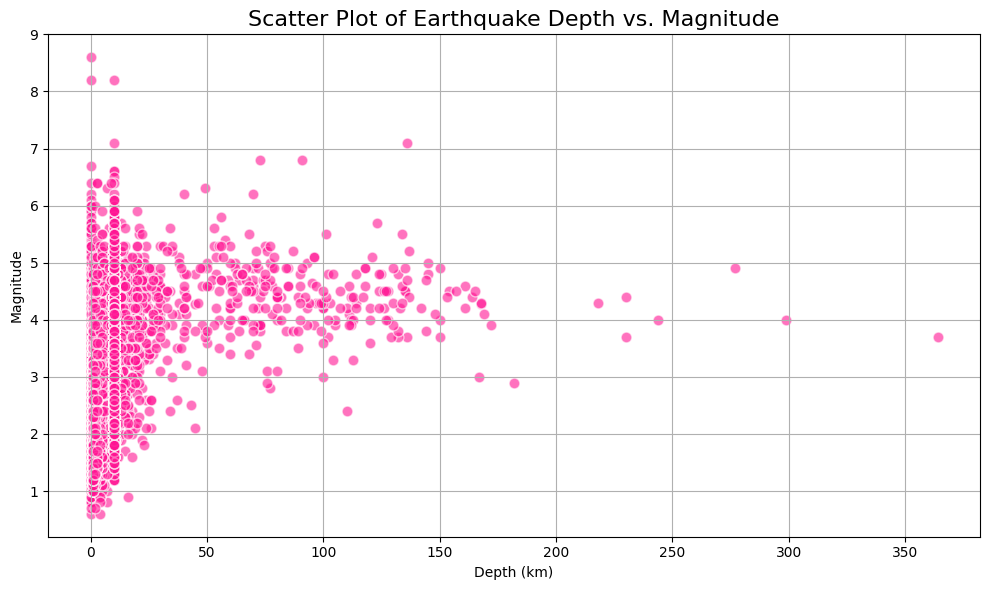

In [9]:
# กรองเฉพาะข้อมูลที่มี DEPTH และ MAG
df = df.dropna(subset=['DEPTH.', 'MAG.'])
df['DEPTH.'] = pd.to_numeric(df['DEPTH.'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['DEPTH.', 'MAG.'])

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['DEPTH.'], df['MAG.'], alpha=0.6, c='deeppink', edgecolors='w', s=60)
plt.title('Scatter Plot of Earthquake Depth vs. Magnitude', fontsize=16)
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## *-2.2 Regional in Thailand*

In [10]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Do

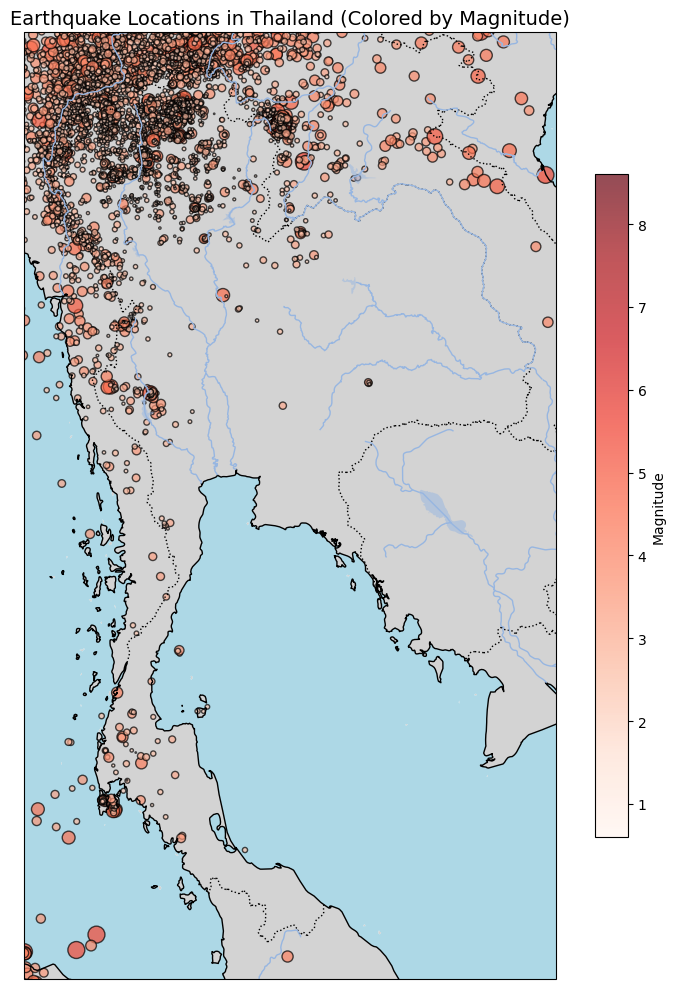

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# เตรียมข้อมูล: กรองเฉพาะแถวที่มีพิกัดและ magnitude
df = df.dropna(subset=["LAT.", "LONG.", "MAG."])
df["MAG."] = pd.to_numeric(df["MAG."], errors="coerce")
df = df[df["MAG."] > 0]

# สร้างแผนที่ประเทศไทย
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# เพิ่มองค์ประกอบแผนที่
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# ตั้งขอบเขตประเทศไทยโดยประมาณ
ax.set_extent([97, 106, 5, 21], crs=ccrs.PlateCarree())

# พล็อตจุดแผ่นดินไหว
sc = ax.scatter(
    df["LONG."], df["LAT."],
    c=df["MAG."],
    s=df["MAG."]**3,  # ขนาดจุดตาม magnitude
    cmap="Reds",
    alpha=0.7,
    edgecolor="k",
    transform=ccrs.PlateCarree()
)

# เพิ่ม colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Magnitude")

# เพิ่มชื่อกราฟ
plt.title("Earthquake Locations in Thailand (Colored by Magnitude)", fontsize=14)
plt.tight_layout()
plt.show()


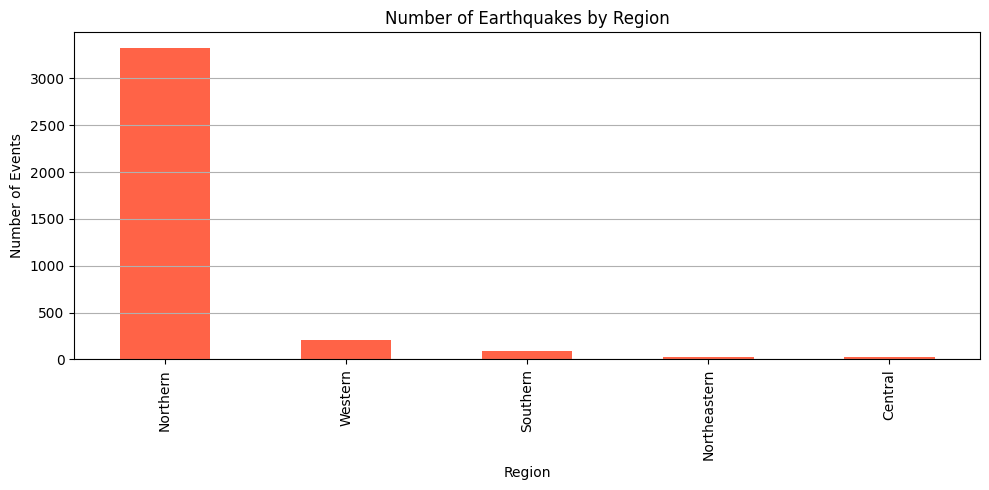

In [12]:
#Number of Events by Region

region_counts = df['THAI_REGION'].value_counts().sort_values(ascending=False)
region_counts.plot(kind='bar', color='tomato', figsize=(10, 5), title='Number of Earthquakes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


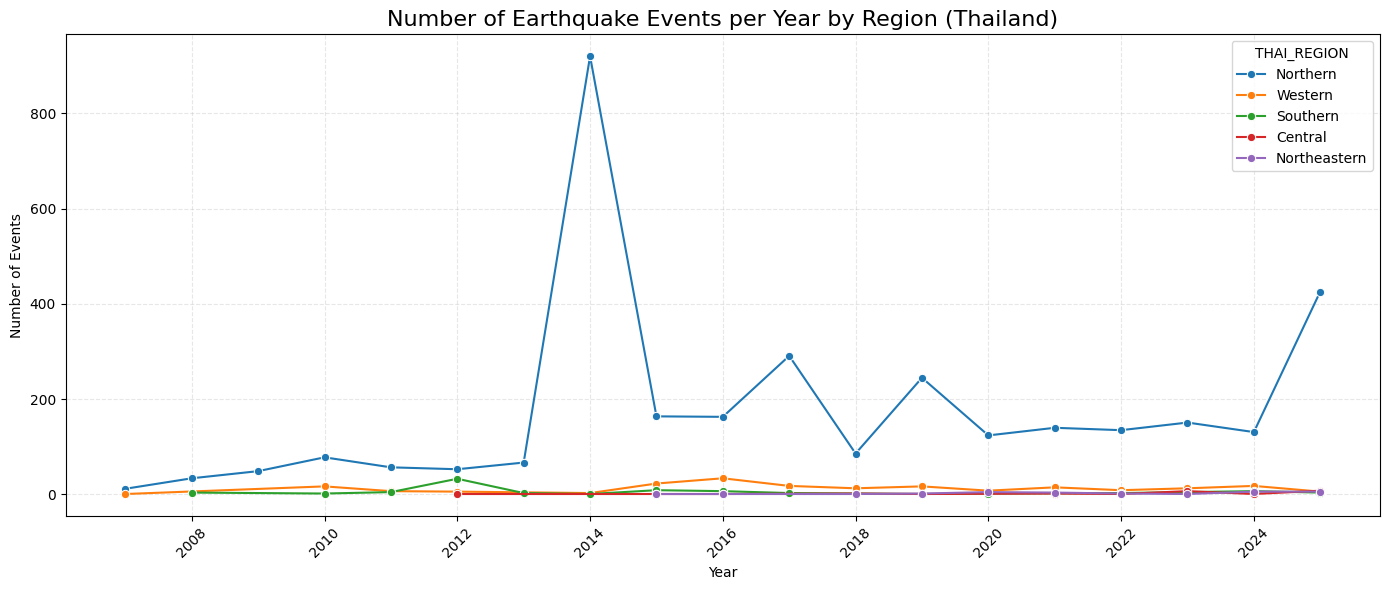

In [13]:
# กรองเฉพาะเหตุการณ์ในประเทศไทย
df_thai = df[df['COUNTRY'] == 'Thailand']  # หรือใช้ LOCATION ถ้าไม่มี COUNTRY

# กรองข้อมูลที่มีปีและ THAI_REGION
df_thai = df_thai.dropna(subset=['YEAR', 'THAI_REGION'])
df_thai['YEAR'] = pd.to_numeric(df_thai['YEAR'], errors='coerce').astype(int)

# สร้างตารางสรุปจำนวนเหตุการณ์ต่อปี × ภูมิภาค
region_year = df_thai.groupby(['YEAR', 'THAI_REGION']).size().reset_index(name='Count')

# พล็อตกราฟ
plt.figure(figsize=(14, 6))
sns.lineplot(data=region_year, x='YEAR', y='Count', hue='THAI_REGION', marker='o')
plt.title('Number of Earthquake Events per Year by Region (Thailand)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(sorted(region_year['YEAR'].unique()), rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


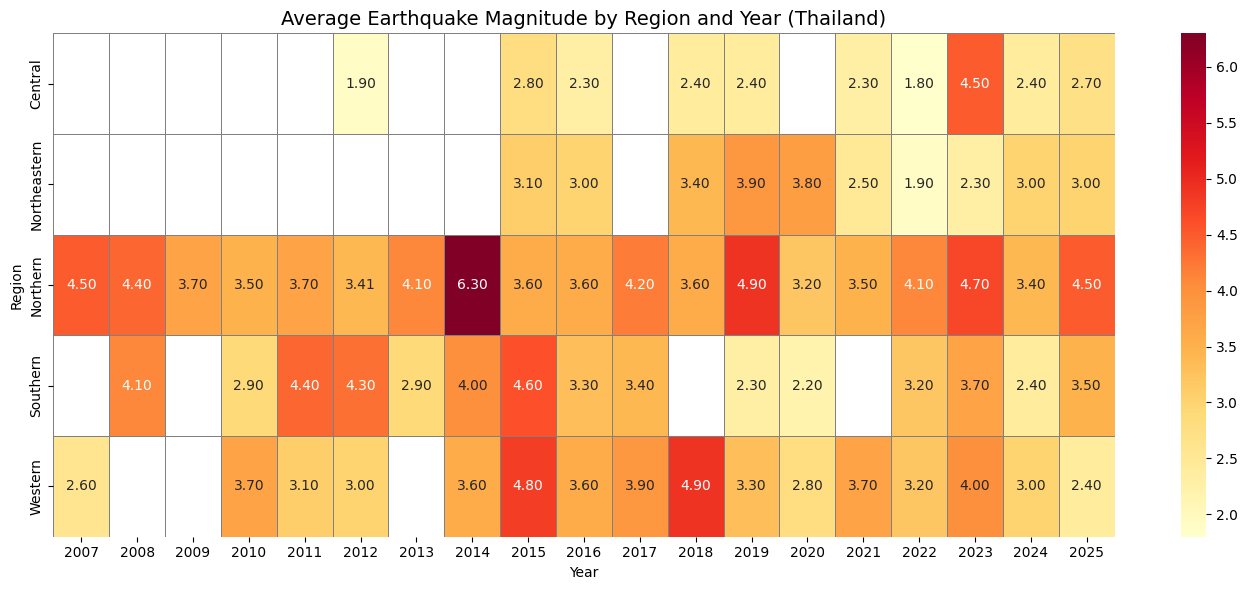

In [14]:
##HeateMap  Average Earthquake Magnitude by Region and Year (Thailand)

# กรองเฉพาะประเทศไทยและข้อมูลที่จำเป็น
df_thai = df[df['COUNTRY'] == 'Thailand']
df_thai = df_thai.dropna(subset=['YEAR', 'THAI_REGION', 'MAG.'])
df_thai['YEAR'] = pd.to_numeric(df_thai['YEAR'], errors='coerce').astype(int)

# สร้าง pivot table: MAG เฉลี่ยรายปี × ภูมิภาค
pivot_mag = df_thai.pivot_table(index='THAI_REGION', columns='YEAR', values='MAG.', aggfunc='max')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_mag, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Average Earthquake Magnitude by Region and Year (Thailand)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()



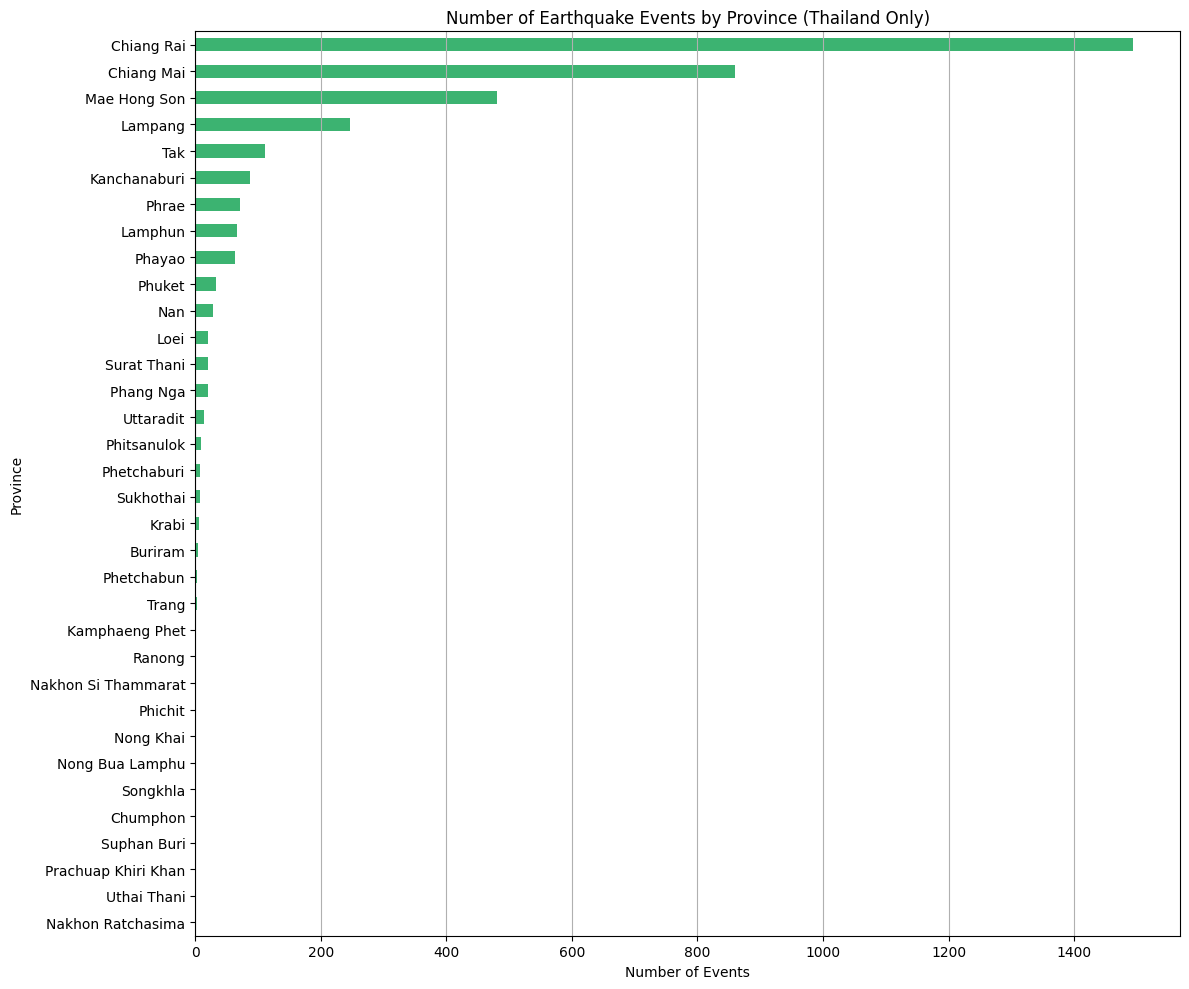

In [15]:
#Number of Events by Province

df[df['COUNTRY'] == 'Thailand']['PROVINCE'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    figsize=(12,10),
    color='mediumseagreen'
)

plt.title('Number of Earthquake Events by Province (Thailand Only)')
plt.xlabel('Number of Events')
plt.ylabel('Province')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

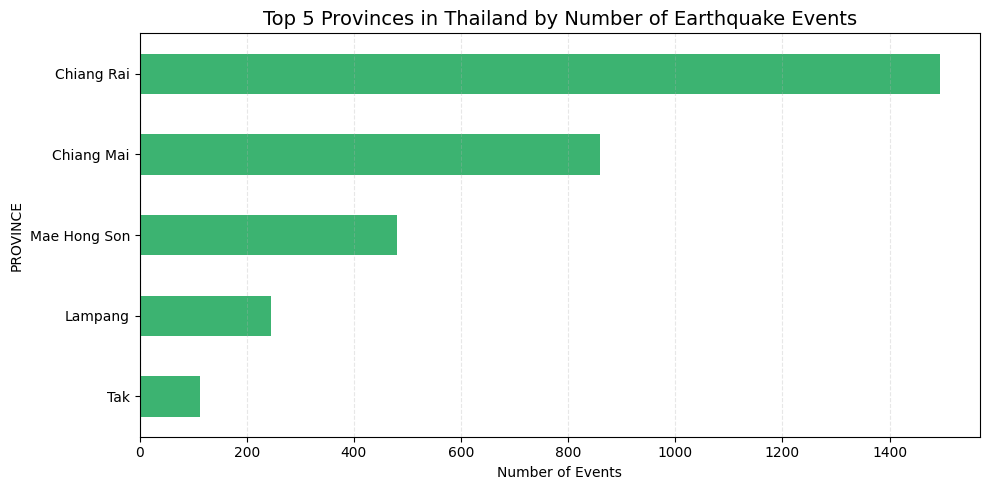

In [16]:
# กรองเฉพาะเหตุการณ์ที่เกิดในประเทศไทย
df_thai = df[df['COUNTRY'] == 'Thailand']  # หรือใช้ LOCATION ถ้าไม่มี COUNTRY

# นับจำนวนเหตุการณ์ต่อจังหวัด
top_count = df_thai['PROVINCE'].value_counts().nlargest(5)

# พล็อตกราฟ horizontal bar chart
plt.figure(figsize=(10, 5))
top_count.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 5 Provinces in Thailand by Number of Earthquake Events', fontsize=14)
plt.xlabel('Number of Events')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


### --*2.2.1 Regional Analysis: Northern Thailand*

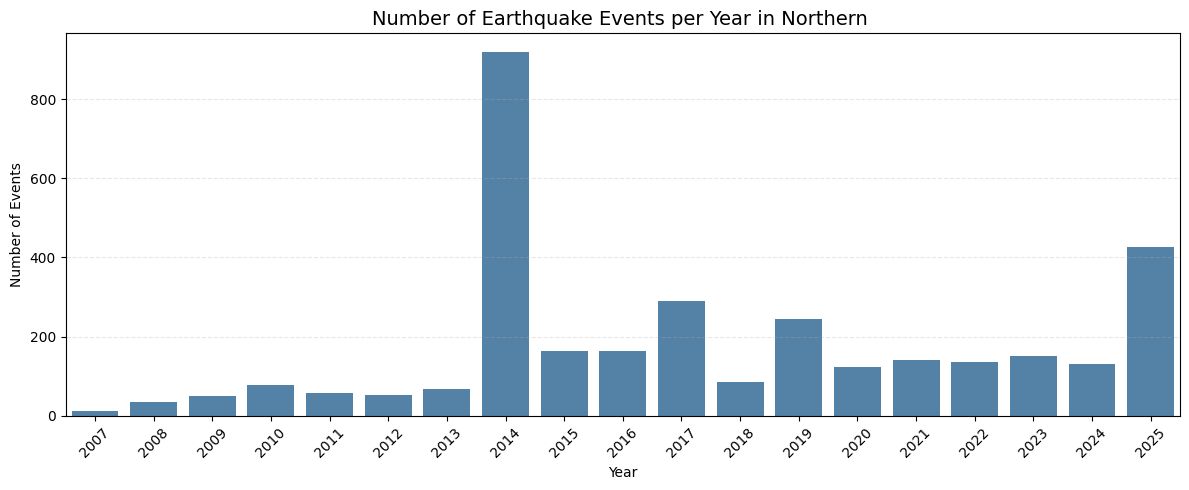

In [20]:
event_count_year = df_north.groupby('YEAR').size().reset_index(name='Count')


df_thai = df[df['COUNTRY'] == 'Thailand']
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)

plt.figure(figsize=(12, 5))
sns.barplot(data=event_count_year, x='YEAR', y='Count', color='steelblue')
plt.title('Number of Earthquake Events per Year in Northern ', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



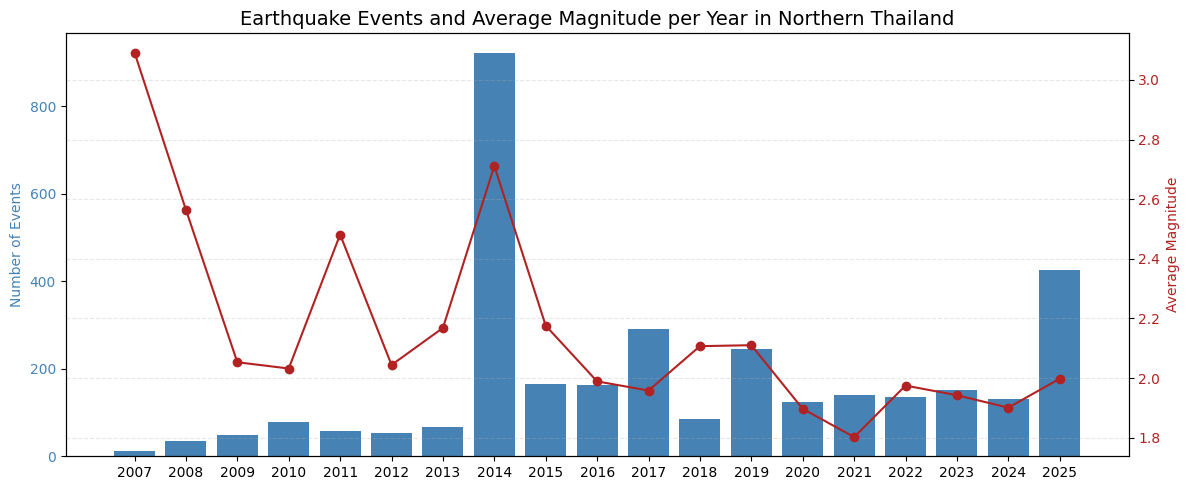

In [21]:
df_thai = df[df['COUNTRY'] == 'Thailand']
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR', 'MAG.'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)

# สร้างตารางสรุป
event_mag_year = df_north.groupby('YEAR').agg(
    Count=('MAG.', 'count'),
    Avg_MAG=('MAG.', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 5))

# แกนซ้าย: จำนวนเหตุการณ์
ax1.bar(event_mag_year['YEAR'], event_mag_year['Count'], color='steelblue', label='Number of Events')
ax1.set_ylabel('Number of Events', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# แกนขวา: MAG เฉลี่ย
ax2 = ax1.twinx()
ax2.plot(event_mag_year['YEAR'], event_mag_year['Avg_MAG'], color='firebrick', marker='o', label='Average MAG')
ax2.set_ylabel('Average Magnitude', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Title และแกน X
plt.title('Earthquake Events and Average Magnitude per Year in Northern Thailand', fontsize=14)
plt.xticks(sorted(event_mag_year['YEAR']), rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()


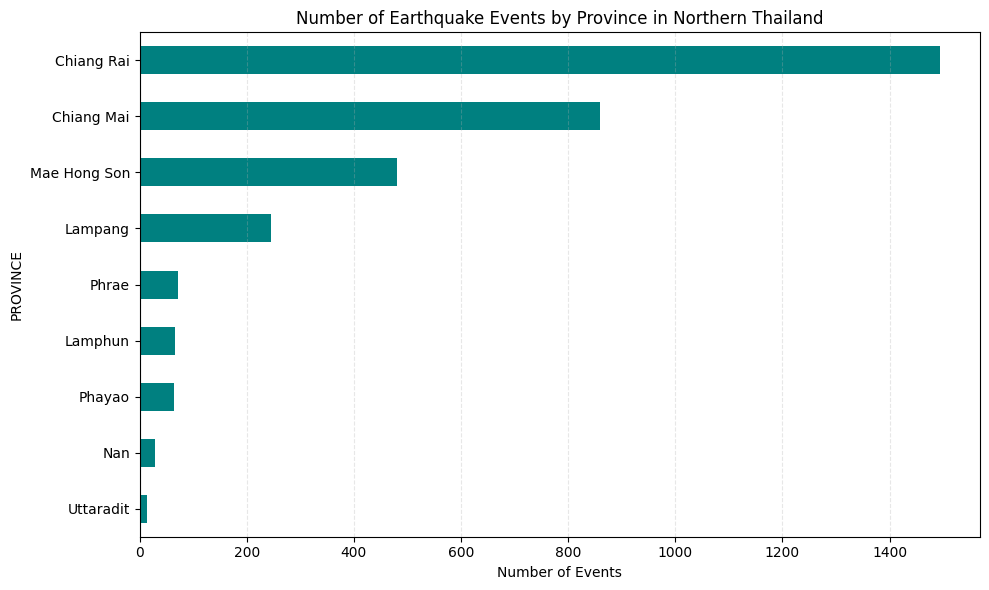

In [22]:
# กรองเฉพาะประเทศไทย
df_thai = df[df['COUNTRY'] == 'Thailand']

# กรองเฉพาะภาค Northern
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR', 'PROVINCE', 'MAG.'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)

top_province_north = df_north['PROVINCE'].value_counts()

plt.figure(figsize=(10, 6))
top_province_north.sort_values().plot(kind='barh', color='teal')
plt.title('Number of Earthquake Events by Province in Northern Thailand')
plt.xlabel('Number of Events')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()



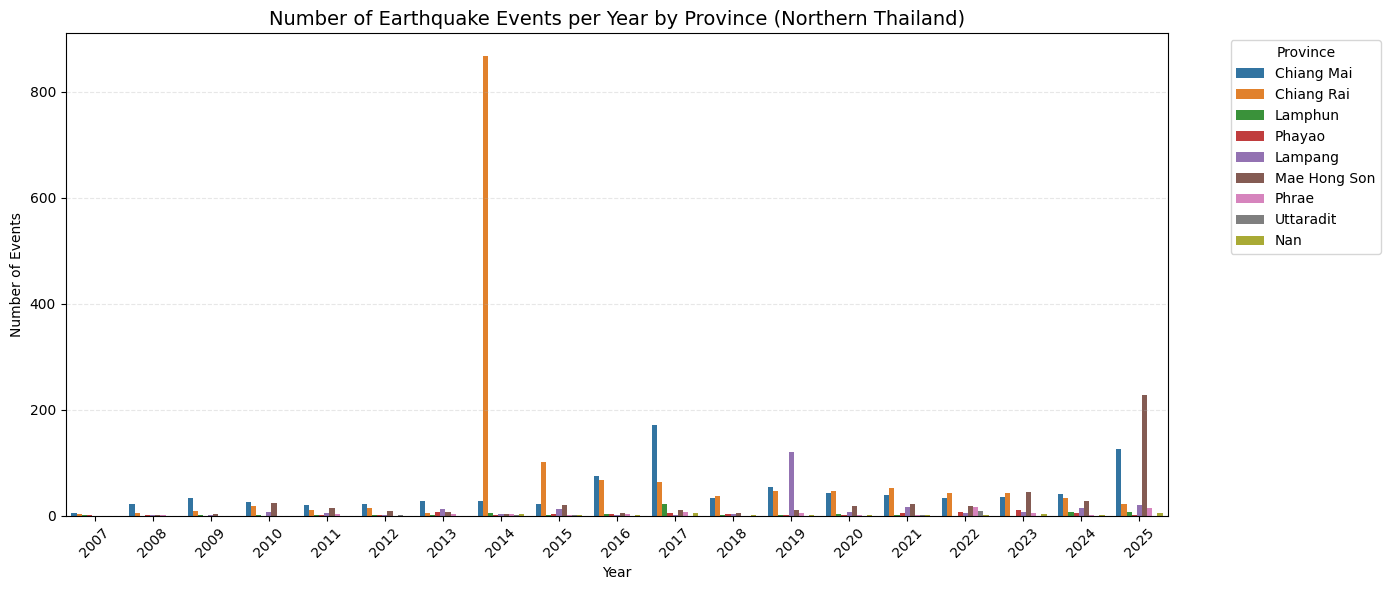

In [23]:
df_thai = df[df['COUNTRY'] == 'Thailand']
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR', 'PROVINCE'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)

# สร้างตารางสรุปจำนวนเหตุการณ์
count_by_province_year = df_north.groupby(['YEAR', 'PROVINCE']).size().reset_index(name='Count')


plt.figure(figsize=(14, 6))
sns.barplot(data=count_by_province_year, x='YEAR', y='Count', hue='PROVINCE')
plt.title('Number of Earthquake Events per Year by Province (Northern Thailand)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 03_Other Analyses

In [ ]:
# แปลงวันที่เป็น datetime แล้วดึงชื่อเดือนภาษาอังกฤษ
df['MONTH_NAME'] = pd.to_datetime(df['DATE THAI']).dt.strftime('%B')

# นับจำนวนเหตุการณ์ในแต่ละเดือน (รวมทุกปี)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['MONTH_NAME'].value_counts().reindex(month_order).plot(kind='bar', color='cornflowerblue', figsize=(10,6))

plt.title('Total Earthquake Events by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

"""แบบรายเดือน"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load earthquake data (English version)
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and prepare data
df = df.dropna(subset=['YEAR', 'DEPTH.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['DEPTH.'] = pd.to_numeric(df['DEPTH.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'DEPTH.'])

# Group by year and calculate average depth
avg_depth_by_year = df.groupby('YEAR')['DEPTH.'].mean().reset_index()

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_depth_by_year, x='YEAR', y='DEPTH.', marker='o', linewidth=2, color='darkgreen')
plt.title('Average Earthquake Depth in Thailand by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Depth (km)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pivot = df.pivot_table(index='THAI_REGION', columns='YEAR', values='MAG.', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')


In [ ]:
# Boxplot AVG_Magnitude Of Thai Region

import seaborn as sns

sns.boxplot(data=df, x='THAI_REGION', y='MAG.')
plt.title('Magnitude Distribution by Region')
plt.xticks(rotation=40)
plt.show()


"""
Northern	มี outliers เยอะมากด้านบน → บ่งชี้ว่ามีเหตุการณ์รุนแรงหลายครั้ง

Southern	Median สูง และ IQR กว้าง → ความรุนแรงเฉลี่ยค่อนข้างสูงและแปรปรวน

Central	IQR แคบและ outlier น้อย → ขนาดแผ่นดินไหวค่อนข้างคงที่

Western & Northeastern	อยู่ระหว่างกลาง → มีความแปรปรวนแต่ไม่สุดโต่ง"""

In [ ]:
# AVG_Magnitude Of Thai Region

df.groupby('THAI_REGION')['MAG.'].mean().sort_values().plot(kind='barh', title='AVG_Magnitude_Region', figsize=(8,5))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and filter
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])
df_mag5 = df[df['MAG.'] >= 7]

# Count events per year
mag5_counts = df_mag5.groupby('YEAR').size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mag5_counts, x='YEAR', y='Count', color='tomato')
plt.title('Number of Earthquakes in Thailand with Magnitude ≥ 7 by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


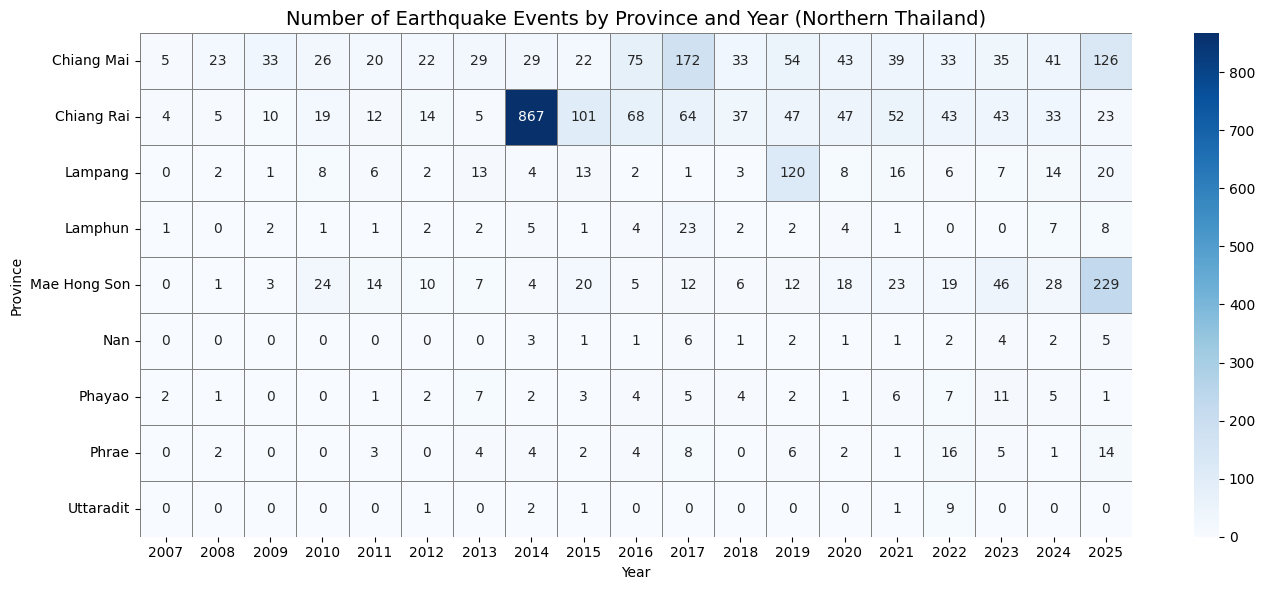

In [19]:

df_thai = df[df['COUNTRY'] == 'Thailand']
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR', 'PROVINCE'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)


pivot_count = df_north.groupby(['PROVINCE', 'YEAR']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_count, cmap='Blues', annot=True, fmt='d', linewidths=0.5, linecolor='gray')
plt.title('Number of Earthquake Events by Province and Year (Northern Thailand)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


In [ ]:
df_thai = df[df['COUNTRY'] == 'Thailand']
df_north = df_thai[df_thai['THAI_REGION'] == 'Northern']
df_north = df_north.dropna(subset=['YEAR', 'PROVINCE'])
df_north['YEAR'] = pd.to_numeric(df_north['YEAR'], errors='coerce').astype(int)

count_by_province_year = df_north.groupby(['YEAR', 'PROVINCE']).size().reset_index(name='Count')


import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(count_by_province_year, col='PROVINCE', col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(sns.barplot, x='YEAR', y='Count', color='steelblue')
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Number of Events')
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Earthquake Events per Year by Province (Northern Thailand)', fontsize=14)
plt.tight_layout()
plt.show()

